In [1]:
!pip install spotipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 6.6 MB/s eta 0:00:00


In [2]:
import networkx as nx
import pandas as pd

# ------- IMPLEMENT HERE ANY AUXILIARY FUNCTIONS NEEDED ------- #
import spotipy
from spotipy . oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

In [3]:
CLIENT_ID = "84d2340210f14b8da88fb64ad85b6ea0"
CLIENT_SECRET = "d436436448a2482da40af7b6a045f86a"
auth_manager = SpotifyClientCredentials(client_id = CLIENT_ID, client_secret = CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager = auth_manager)

# Functions

In [4]:
import matplotlib.pyplot as plt

def plot_degree_distribution(degree_dict: dict, normalized: bool = False, loglog: bool = False) -> None:
    degrees = list(degree_dict.keys())
    counts = list(degree_dict.values())

    if normalized:
        total_count = sum(counts)
        probabilities = [count / total_count for count in counts]
        counts = probabilities

    if loglog:
        plt.loglog(degrees, counts, 'bo-', markersize=4)
        plt.xlabel('Degree')
        plt.ylabel('Frequency' if not normalized else 'Probability')
        plt.title('Log-Log Degree Distribution')
    else:
        plt.plot(degrees, counts, 'bo-', markersize=4)
        plt.xlabel('Degree')
        plt.ylabel('Frequency' if not normalized else 'Probability')
        plt.title('Degree Distribution')

    plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_audio_features(artists_audio_feat: pd.DataFrame, artist1_id: str, artist2_id: str) -> None:
    artist1_data = artists_audio_feat.loc[artists_audio_feat['artist_id'] == artist1_id]
    artist2_data = artists_audio_feat.loc[artists_audio_feat['artist_id'] == artist2_id]

    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo']

    angles = np.linspace(0, 2 * np.pi, len(audio_features), endpoint=False).tolist()
    angles += angles[:1]  # Repeat the first angle to close the circle

    artist1_values = artist1_data[audio_features].values.flatten().tolist()
    artist1_values += artist1_values[:1]  # Repeat the first value to close the circle

    artist2_values = artist2_data[audio_features].values.flatten().tolist()
    artist2_values += artist2_values[:1]  # Repeat the first value to close the circle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
    ax.plot(angles, artist1_values, 'o-', label=f'Artist 1: {artist1_id}')
    ax.fill(angles, artist1_values, alpha=0.25)
    ax.plot(angles, artist2_values, 'o-', label=f'Artist 2: {artist2_id}')
    ax.fill(angles, artist2_values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(audio_features)
    ax.set_yticklabels([])  # Hide radial axis labels
    ax.set_title('Audio Features Comparison', fontsize=14, fontweight='bold')
    ax.grid(True)
    ax.legend(loc='upper right')

    plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_audio_features(artists_audio_feat: pd.DataFrame, artist1_id: str, artist2_id: str) -> None:
    artist1_data = artists_audio_feat.loc[artists_audio_feat['artist_id'] == artist1_id]
    artist2_data = artists_audio_feat.loc[artists_audio_feat['artist_id'] == artist2_id]

    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo']

    angles = np.linspace(0, 2 * np.pi, len(audio_features), endpoint=False).tolist()
    angles += angles[:1]  # Repeat the first angle to close the circle

    artist1_values = artist1_data[audio_features].values.flatten().tolist()
    artist1_values += artist1_values[:1]  # Repeat the first value to close the circle

    artist2_values = artist2_data[audio_features].values.flatten().tolist()
    artist2_values += artist2_values[:1]  # Repeat the first value to close the circle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
    ax.plot(angles, artist1_values, 'o-', label=f'Artist 1: {artist1_id}')
    ax.fill(angles, artist1_values, alpha=0.25)
    ax.plot(angles, artist2_values, 'o-', label=f'Artist 2: {artist2_id}')
    ax.fill(angles, artist2_values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(audio_features)
    ax.set_yticklabels([])  # Hide radial axis labels
    ax.set_title('Audio Features Comparison', fontsize=14, fontweight='bold')
    ax.grid(True)
    ax.legend(loc='upper right')

    # Set y-axis labels
    max_value = max(max(artist1_values), max(artist2_values))
    y_ticks = np.linspace(0, max_value, 6)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([str(round(tick, 2)) for tick in y_ticks])

    plt.show()


In [22]:
import seaborn as sns

def plot_similarity_heatmap(artist_audio_features_df: pd.DataFrame, similarity: str, out_filename: str = None) -> None:
    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo']
    
    # Compute similarity matrix
    similarity_matrix = artist_audio_features_df[audio_features].corr(method=similarity)
    
    # Set up the figure
    plt.figure(figsize=(10, 8))
    
    # Create heatmap
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', square=True, cbar=True)
    plt.title(f'Artist Similarity Heatmap ({similarity} similarity)')
    plt.xlabel('Artist 1')
    plt.ylabel('Artist 2')
    
    # Set colorbar label
    cbar = plt.gca().collections[0].colorbar
    cbar.set_label('Similarity')
    
    # Save or display the plot
    if out_filename:
        plt.savefig(out_filename)
    else:
        plt.show()




# Calls

In [10]:
tracks_df = pd.read_csv('D_df.csv')
gB_und = nx.read_graphml('gB_und.graphml')
gD_und = nx.read_graphml('gD_und.graphml')

gwB = nx.read_graphml('gwB.graphml')
DataFrame= pd.read_csv('D_df.csv', index_col="track_id")

NECESITO IMPORTAR UNA FUNCION DEL 3 PARA OBTENER LA DEGREE DISTRIBUTION

In [11]:
def get_degree_distribution(g: nx.Graph) -> dict:
    """
    Get the degree distribution of the graph.

    :param g: networkx graph.
    :return: dictionary with degree distribution (keys are degrees, values are number of occurrences).
    """

    # Convert DegreeView object to dictionary
    node_degrees = dict(g.degree())

    # Initialize the dictionary for degree distribution.
    degree_distribution_dict = {}

    # Iterate over the nodes_degrees
    for degree in node_degrees.values():
        if degree in degree_distribution_dict:
            degree_distribution_dict[degree] += 1
        else:
            degree_distribution_dict[degree] = 1

    return degree_distribution_dict

    # ----------------- END OF FUNCTION --------------------- #

In [12]:
def compute_mean_audio_features(tracks_df: pd.DataFrame) -> pd.DataFrame:
    # Group tracks by artist and compute mean audio features
    artist_df = tracks_df.groupby(['artist_id', 'artist_name']).mean().reset_index()

    # Select relevant columns for the resulting dataframe
    artist_df = artist_df[['artist_id', 'artist_name', 'danceability', 'energy', 'loudness']]

    return artist_df


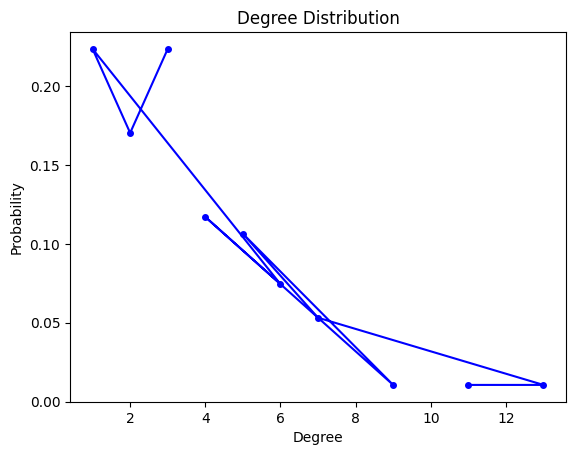

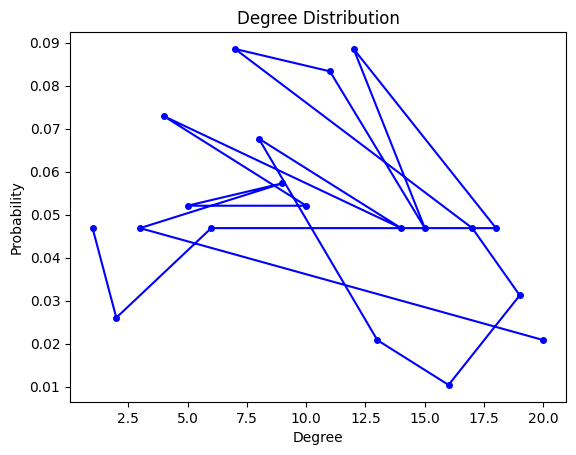

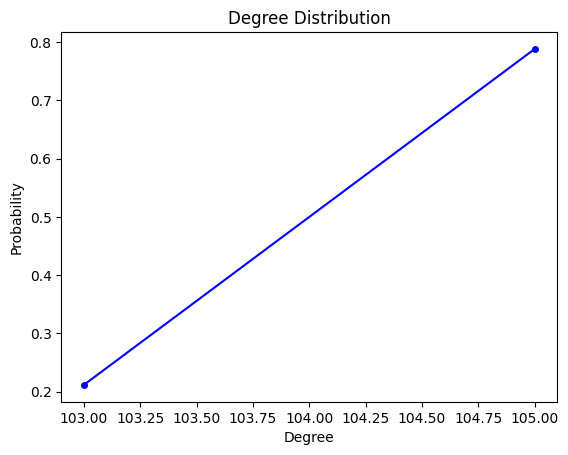

In [13]:

# Compute and plot the degree distribution for g′B
degree_distribution_gB = get_degree_distribution(gB_und)
plot_degree_distribution(degree_distribution_gB, normalized=True, loglog=False)

# Compute and plot the degree distribution for g′D
degree_distribution_gD = get_degree_distribution(gD_und)
plot_degree_distribution(degree_distribution_gD, normalized=True, loglog=False)

# Compute and plot the degree distribution for gwB
degree_distribution_gwB = get_degree_distribution(gwB)
plot_degree_distribution(degree_distribution_gwB, normalized=True, loglog=False)

In [14]:
def plot_audio_features_bar(artists_audio_feat: pd.DataFrame, artist1_id: str, artist2_id: str) -> None:
    """
    Plot a single figure with a plot of mean audio features of two different artists.

    :param artists_audio_feat: dataframe with mean audio features of artists.
    :param artist1_id: string with id of artist 1.
    :param artist2_id: string with id of artist 2.
    :return: None
    """
    # Filter the dataframe for the two artists
    artist1_data = artists_audio_feat[artists_audio_feat['artist_id'] == artist1_id]
    artist2_data = artists_audio_feat[artists_audio_feat['artist_id'] == artist2_id]

    # Get the audio feature labels and their positions on the x-axis
    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo']
    x_pos = np.arange(len(audio_features))

    # Get the mean values of audio features for artist 1 and artist 2
    artist1_values = artist1_data[audio_features].values[0]
    artist2_values = artist2_data[audio_features].values[0]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the bar chart for artist 1
    ax.bar(x_pos, artist1_values, width=0.4, align='center', label=artist1_data['artist_name'].values[0])

    # Plot the bar chart for artist 2
    ax.bar(x_pos + 0.4, artist2_values, width=0.4, align='center', label=artist2_data['artist_name'].values[0])

    # Set the x-axis ticks and labels
    ax.set_xticks(x_pos + 0.2)
    ax.set_xticklabels(audio_features, rotation=45, ha='right')

    # Set the axis labels and title
    ax.set_xlabel('Audio Features')
    ax.set_ylabel('Mean Value')
    ax.set_title('Comparison of Mean Audio Features')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()
    # ----------------- END OF FUNCTION --------------------- #

In [15]:

def plot_audio_features_radar(artists_audio_feat: pd.DataFrame, artist1_id: str, artist2_id: str) -> None:
    """
    Plot a single figure with a radar plot of mean audio features of two different artists.

    :param artists_audio_feat: dataframe with mean audio features of artists.
    :param artist1_id: string with id of artist 1.
    :param artist2_id: string with id of artist 2.
    :return: None
    """
    # Filter the dataframe for the two artists
    artist1_data = artists_audio_feat[artists_audio_feat['artist_id'] == artist1_id]
    artist2_data = artists_audio_feat[artists_audio_feat['artist_id'] == artist2_id]

    # Get the audio feature labels and their positions on the radar plot
    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo']
    angles = np.linspace(0, 2 * np.pi, len(audio_features), endpoint=False).tolist()
    angles += angles[:1]  # Repeat the first angle to close the plot

    # Get the mean values of audio features for artist 1 and artist 2
    artist1_values = artist1_data[audio_features].values[0].tolist()
    artist1_values += artist1_values[:1]  # Repeat the first value to close the plot
    
    artist2_values = artist2_data[audio_features].values[0].tolist()
    artist2_values += artist2_values[:1]  # Repeat the first value to close the plot

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

    # Plot the radar plot for artist 1
    ax.plot(angles, artist1_values, label=artist1_id)
    ax.fill(angles, artist1_values, alpha=0.25)

    # Plot the radar plot for artist 2
    ax.plot(angles, artist2_values, label=artist2_id)
    ax.fill(angles, artist2_values, alpha=0.25)

    # Set the angle ticks and labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(audio_features, fontsize=8)

    # Set the y-axis labels and limits
    #ax.set_ylim(0, 1)
    #ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    #ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8'])

    # Set the title and legend
    ax.set_title('Comparison of Mean Audio Features', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right')

    # Show the plot
    plt.show()

In [16]:
def normalize_audio_features(tracks_df: pd.DataFrame) -> pd.DataFrame:
    """
    Normalize the audio features in the dataframe to the range [0, 1].

    :param tracks_df: dataframe with audio features.
    :return: normalized dataframe.
    """
    # Select the audio feature columns
    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo']
    
    # Normalize the audio feature columns using min-max scaling
    tracks_df[audio_features] = (tracks_df[audio_features] - tracks_df[audio_features].min()) / (tracks_df[audio_features].max() - tracks_df[audio_features].min())

    return tracks_df

drake_artist_id= '3TVXtAsR1Inumwj472S9r4'
# Normalize the audio features in the dataframe
normalized_df = normalize_audio_features(tracks_df)



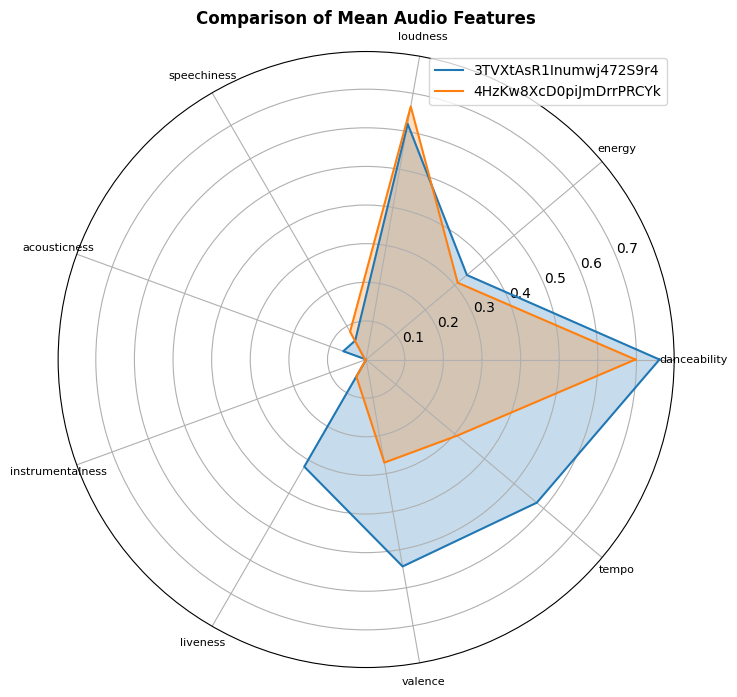

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
numeric_columns = ['duration', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

similarity_matrix = cosine_similarity(normalized_df[numeric_columns])


# Find the index of Drake in the dataframe
drake_index = normalized_df[normalized_df['artist_id'] == drake_artist_id].index[0]

# Calculate the similarity scores between Drake and all other artists
similarity_scores = similarity_matrix[drake_index]

# Set the similarity score of Drake to a very low value
similarity_scores[drake_index] = -1

# Find the index of the most similar artist
most_similar_artist_index = np.argmax(similarity_scores)

# Get the artist id of the most similar artist
most_similar_artist_id = normalized_df.loc[most_similar_artist_index, 'artist_id']

# Generate the comparison using plot_audio_features_radar
plot_audio_features_radar(normalized_df, drake_artist_id, most_similar_artist_id)



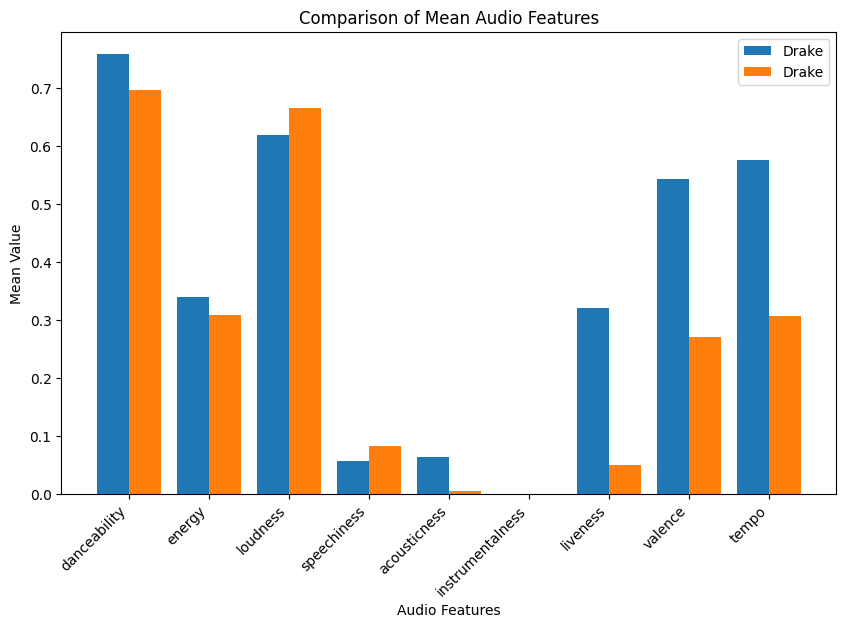

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
numeric_columns = ['duration', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

similarity_matrix = cosine_similarity(normalized_df[numeric_columns])


# Find the index of Drake in the dataframe
drake_index = normalized_df[normalized_df['artist_id'] == drake_artist_id].index[0]

# Calculate the similarity scores between Drake and all other artists
similarity_scores = similarity_matrix[drake_index]

# Set the similarity score of Drake to a very low value
similarity_scores[drake_index] = -1

# Find the index of the most similar artist
most_similar_artist_index = np.argmax(similarity_scores)

# Get the artist id of the most similar artist
most_similar_artist_id = normalized_df.loc[most_similar_artist_index, 'artist_id']

# Generate the comparison using plot_audio_features_radar
plot_audio_features_bar(normalized_df, drake_artist_id, most_similar_artist_id)


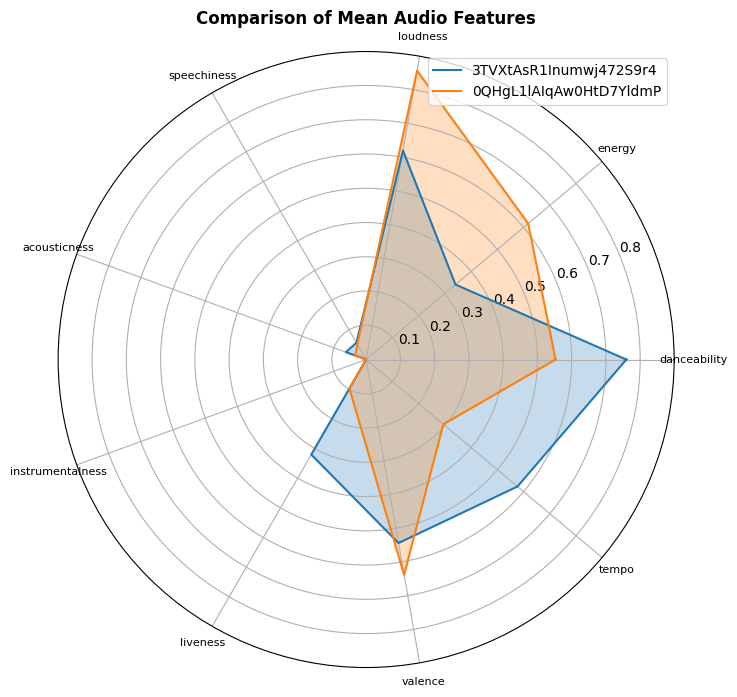

In [19]:
# Find the index of Drake in the dataframe
drake_index = normalized_df[normalized_df['artist_id'] == drake_artist_id].index[0]

# Calculate the similarity scores between Drake and all other artists
similarity_scores = similarity_matrix[drake_index]

# Set the similarity score of Drake to a very high value
similarity_scores[drake_index] = 1

# Find the index of the least similar artist
least_similar_artist_index = np.argmin(similarity_scores)

# Get the artist id of the least similar artist
least_similar_artist_id = normalized_df.loc[least_similar_artist_index, 'artist_id']

# Generate the comparison using plot_audio_features_radar
plot_audio_features_radar(normalized_df, drake_artist_id, least_similar_artist_id)


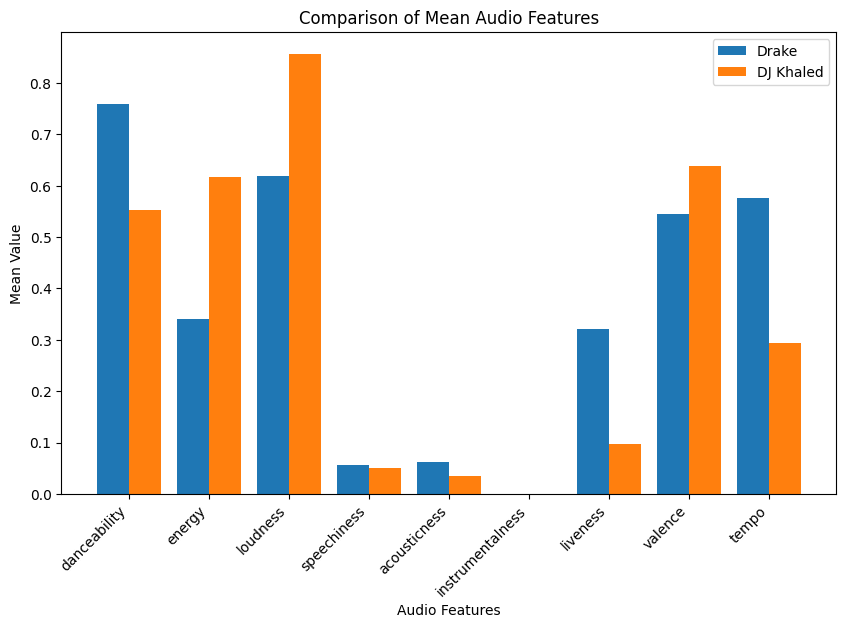

In [20]:
# Find the index of Drake in the dataframe
drake_index = normalized_df[normalized_df['artist_id'] == drake_artist_id].index[0]

# Calculate the similarity scores between Drake and all other artists
similarity_scores = similarity_matrix[drake_index]

# Set the similarity score of Drake to a very high value
similarity_scores[drake_index] = 1

# Find the index of the least similar artist
least_similar_artist_index = np.argmin(similarity_scores)

# Get the artist id of the least similar artist
least_similar_artist_id = normalized_df.loc[least_similar_artist_index, 'artist_id']

# Generate the comparison using plot_audio_features_radar
plot_audio_features_bar(normalized_df, drake_artist_id, least_similar_artist_id)


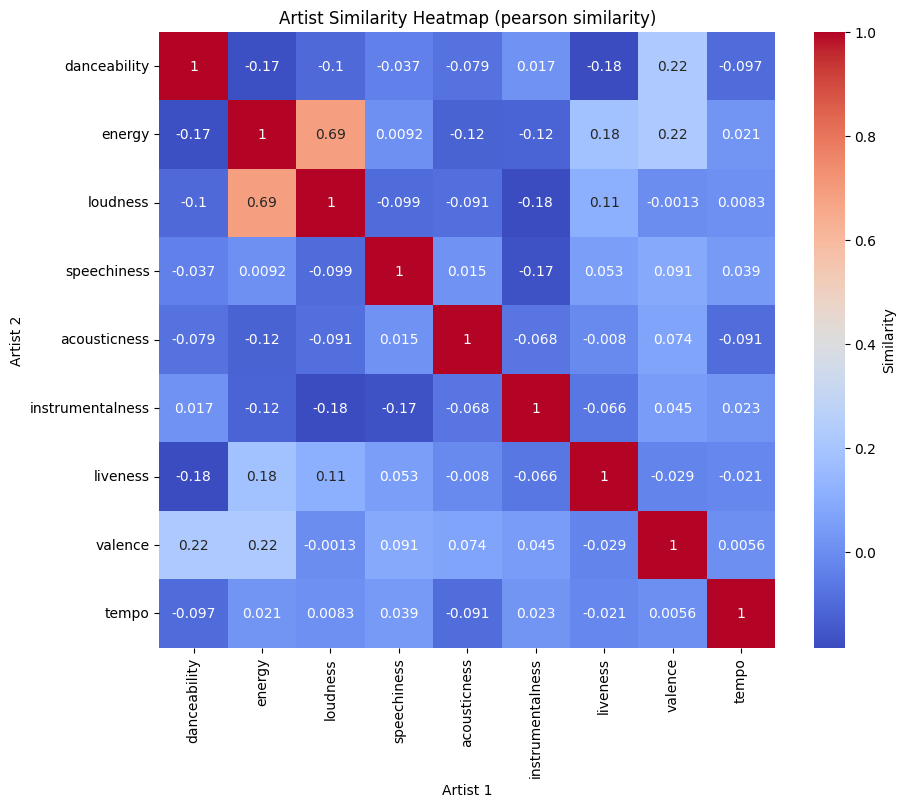

In [23]:
plot_similarity_heatmap(tracks_df, similarity='pearson', out_filename='similarity_heatmap.png')